# PCA

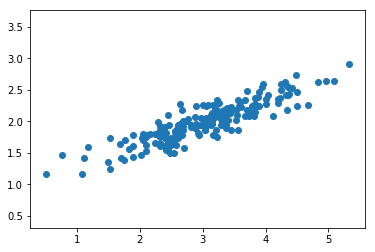

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#generate data
rng = np.random.RandomState(1)
X = [3,2] + np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.show()

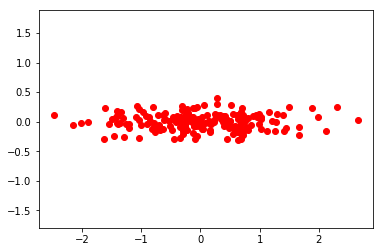

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c='r')
plt.axis('equal');
plt.show()

In [ ]:
print(np.cov(X.T))
print(np.cov(X_pca.T))

[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]
[[ 7.62531501e-01 -1.46979338e-18]
 [-1.46979338e-18  1.84778955e-02]]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
print(pca.mean_)
print(pca.components_[0])
print(pca.components_[1])
print(pca.explained_variance_)

[3.03351168 1.99591928]
[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]
[0.7625315 0.0184779]


## From scratch

In [ ]:
from numpy import array
from numpy import mean
from numpy.linalg import eig

# calculate the mean of each column
M = mean(X.T, axis=1)
print('mean = ',M)
# center columns by subtracting column means
X_ = X - M
#print(X_)
# calculate covariance matrix of centered matrix
V = np.dot(X_.T,X_)/np.shape(X_)[0]
print('cov matrix = ')
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print('values = ',values)
#in eig function implementation, eigenvalues are transposed
vectors = vectors.T
print('eigenvector0 = ', vectors[0])
print('eigenvector1 = ', vectors[1])
print('eigenvalues = ',values)

mean =  [3.03351168 1.99591928]
cov matrix = 
[[0.67876672 0.22978007]
 [0.22978007 0.09833763]]
values =  [0.75871884 0.01838551]
eigenvector0 =  [0.94446029 0.32862557]
eigenvector1 =  [-0.32862557  0.94446029]
eigenvalues =  [0.75871884 0.01838551]


In [ ]:
# project data
P = vectors.dot(X_.T).T
print(X_.shape)
print(P.shape)
# calculate covariance matrix of project data
V = np.dot(P.T,P)/np.shape(P)[0]
print('cov matrix of projected data = ')
print(V)

(200, 2)
(200, 2)
cov matrix of projected data = 
[[7.58718843e-01 6.46869345e-17]
 [6.46869345e-17 1.83855060e-02]]


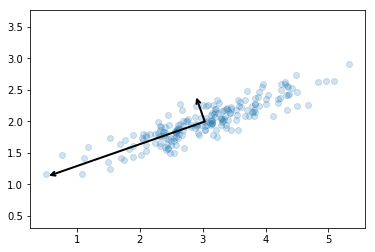

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## Projected data on the new axes 

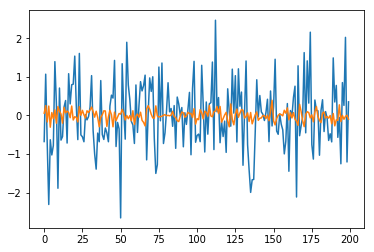

In [ ]:
#plot projection of each pc
plt.plot(P[:,0])
plt.plot(P[:,1])

##  Human Activity Recognition with Smartphones 



In [ ]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = 'C:\WPy-3702\notebooks\docs\ML_course\Intel-ML101_Class1\data'

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [ ]:
import pandas as pd
#The filepath is dependent on the data_path set in the previous cell 
filepath = 'C:\\WPy-3702\\notebooks\\docs\\ML_course\\Intel-ML101_Class1\data\\Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [ ]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [ ]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [ ]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [ ]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [ ]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.Activity)
data['Activity'] = le.transform(data.Activity)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [ ]:
feature_cols = data.columns[:-1]

## Apply pca
# check explained variance

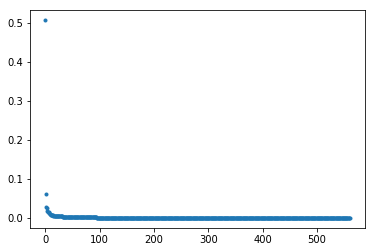

In [ ]:
X = data[feature_cols]
X = (X - X.mean())/X.std()
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_,'.')

## what is the first principal component?

In [ ]:
pc0 = pca.components_[0]
print(pc0.shape)
print(pc0[:10])

(561,)
[ 0.00032202 -0.00265502 -0.00183102  0.05640365  0.05677673  0.05438696
  0.05620397  0.05629792  0.05394706  0.05592999]


## PCA transform and inverse transform manually

# data_pca = np.dot(data - pca.mean_, pca.components_.T[:,:dim])
# data_"original" = np.dot(data_pca, pca.components_[:dim, :]) + pca.mean_

In [ ]:
#We don't use mean because weve already normalized X
print('pca_mean = ',pca.mean_[:10])

pca_mean =  [ 5.52138413e-15 -1.40397560e-15 -5.28715822e-15 -2.19530730e-15
  4.19467893e-16 -3.34608435e-15 -1.83517203e-16  1.96901541e-15
  4.45684637e-15  3.64343741e-15]


In [ ]:
pca = PCA(n_components=2).fit_transform(data[feature_cols])

In [ ]:
# play with number of pca dimensions
dim = 2
pca = PCA(n_components=dim).fit(X)
X_v = X.values

X_pca = np.dot(X_v[0], pca.components_.T[:,:dim])
X_reonstructed = np.dot(X_pca, pca.components_[:dim, :])

plt.plot(X_v[0],'r')
plt.plot(X_reonstructed,'b')

## Project the features on 2D pca space for vizualization


{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


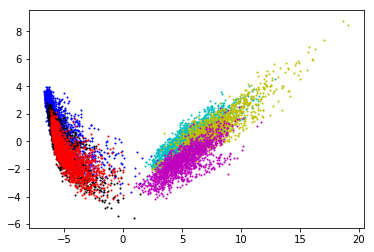

In [ ]:
pca = PCA(n_components=2).fit_transform(data[feature_cols])
plt.scatter(pca[data['Activity']==0,0],pca[data['Activity']==0,1],c='b',s=1)
plt.scatter(pca[data['Activity']==1,0],pca[data['Activity']==1,1],c='k',s=1)
plt.scatter(pca[data['Activity']==2,0],pca[data['Activity']==2,1],c='r',s=1)
plt.scatter(pca[data['Activity']==3,0],pca[data['Activity']==3,1],c='c',s=1)
plt.scatter(pca[data['Activity']==4,0],pca[data['Activity']==4,1],c='y',s=1)
plt.scatter(pca[data['Activity']==5,0],pca[data['Activity']==5,1],c='m',s=1)
print(le_name_mapping)

## note that it's difficult to separate between 'SITTING' (black) and 'STANDING' (red)

## plot pca clusters

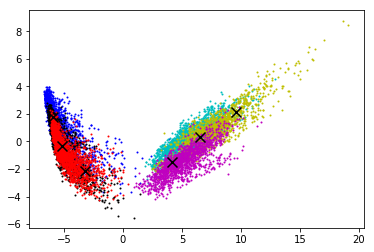

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, n_init=10, max_iter=200)
kmeans.fit(pca)
plt.scatter(pca[data['Activity']==0,0],pca[data['Activity']==0,1],c='b',s=1)
plt.scatter(pca[data['Activity']==1,0],pca[data['Activity']==1,1],c='k',s=1)
plt.scatter(pca[data['Activity']==2,0],pca[data['Activity']==2,1],c='r',s=1)
plt.scatter(pca[data['Activity']==3,0],pca[data['Activity']==3,1],c='c',s=1)
plt.scatter(pca[data['Activity']==4,0],pca[data['Activity']==4,1],c='y',s=1)
plt.scatter(pca[data['Activity']==5,0],pca[data['Activity']==5,1],c='m',s=1)
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1], marker='x',s=100, color = 'k')
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1], marker='x',s=100, color = 'k')
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1], marker='x',s=100, color = 'k')
plt.scatter(kmeans.cluster_centers_[3,0],kmeans.cluster_centers_[3,1], marker='x',s=100, color = 'k')
plt.scatter(kmeans.cluster_centers_[4,0],kmeans.cluster_centers_[4,1], marker='x',s=100, color = 'k')
plt.scatter(kmeans.cluster_centers_[5,0],kmeans.cluster_centers_[5,1], marker='x',s=100, color = 'k')

# housing prices in Ames, Iowa. 

In [ ]:
import pandas as pd
import numpy as np
import os
from __future__ import print_function

# Import the data using the file path
filepath = 'C:\\WPy-3702\\notebooks\\docs\\ML_course\\Intel-ML101_Class1\data\\Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')

print(data.shape)

(1379, 80)


In [ ]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

215

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [ ]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

# Fit pca and check explained variance

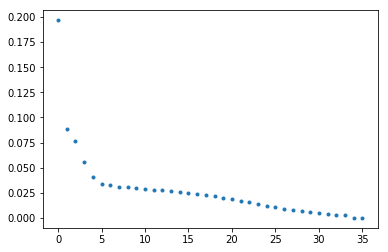

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X_data_ = (X_data - np.mean(X_data))/np.std(X_data) 
pca = PCA().fit(X_data_)
plt.plot(pca.explained_variance_ratio_,'.')

## Project the features on the pca space


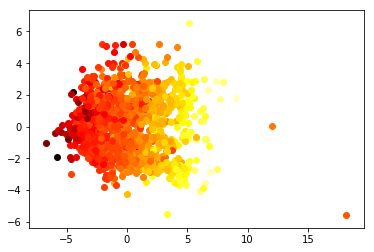

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_data_ = np.log(data[y_col].values)
y_data_ = scaler.fit_transform(y_data_.reshape(-1, 1))

cmap = plt.cm.hot

pca = PCA(n_components=2).fit_transform(X_data_)
for i,j in enumerate(pca):
    plt.scatter(j[0],j[1],color=cmap(y_data_[i]))

## Again with the sparse features (one hot encoded)


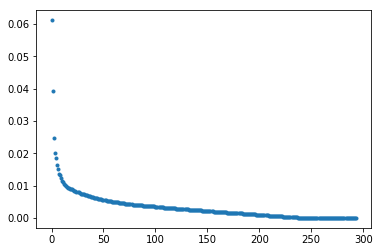

In [ ]:
X_data_ohc_ = (X_data_ohc - np.mean(X_data_ohc))/np.std(X_data_ohc)
pca = PCA().fit(X_data_ohc_)
plt.plot(pca.explained_variance_ratio_,'.')

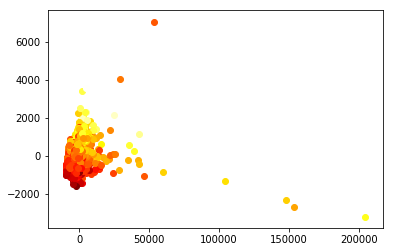

In [ ]:
pca = PCA(n_components=2).fit_transform(X_data_ohc)
for i,j in enumerate(pca):
    plt.scatter(j[0],j[1],color=cmap(y_data_[i]))

## Check the pca decorrelates the features


In [ ]:
cov = np.dot(X_data_.T, X_data_) / X_data_.shape[0] # get the data covariance matrix
print('cov before pca\n')
print(cov[:3,:3])
pca = PCA(n_components=3).fit_transform(X_data_)
cov = np.dot(pca.T, pca) / pca.shape[0] # get the data covariance matrix
print('\n cov AFTER pca\n')
print(cov[:3,:3])

cov before pca

[[ 1.         -0.22371034  0.05319962]
 [-0.22371034  1.         -0.02665388]
 [ 0.05319962 -0.02665388  1.        ]]

 cov AFTER pca

[[7.08388428e+00 5.15259417e-17 4.12207533e-17]
 [5.15259417e-17 3.18610360e+00 1.42082784e-15]
 [4.12207533e-17 1.42082784e-15 2.74099813e+00]]


## Question 3
# Using the one hot encoded features (very sparse!!!) ...
* Try linear regression: standard vs Regularized
* Try fitting a standars LR wit pca transformed features
* Change pca dimensions


In [ ]:
X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc_, y_data_, 
                                                    test_size=0.3, random_state=42)

# Standard Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_ohc, y_train_ohc)
score = lr.score(X_test_ohc,y_test_ohc)
print('lr score = ', score)

# L2 regularized linear regression
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5).fit(X_train_ohc, y_train_ohc)
score = reg.score(X_test_ohc,y_test_ohc)
print('lr_l2 score = ', score)

#PCA try with n_components=1,2,3,...
pca = PCA(n_components=3).fit(X_train_ohc)
lr = LinearRegression().fit(pca.transform(X_train_ohc), y_train_ohc)
score = lr.score(pca.transform(X_test_ohc),y_test_ohc)
print('lr_pca score = ', score)

lr score =  -2.2867422131859814e+23
lr_l2 score =  0.8127374076253027
lr_pca score =  0.8124536524721725


## Question 4
# Using the continuous features (compact!!!) ...
* Try linear regression: standard vs Regularized
* Try fitting a standars LR wit pca transformed features


In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_data_, y_data_, 
                                                    test_size=0.3, random_state=42)

# Standard Linear regressio
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_, y_train_)
score = lr.score(X_test_,y_test_)
print('lr score = ', score)

# L2 regularized linear regression
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5).fit(X_train_, y_train_)
score = reg.score(X_test_,y_test_)
print('lr_l2 score = ', score)

#PCA
pca = PCA(n_components=5).fit(X_train_)
lr = LinearRegression().fit(pca.transform(X_train_), y_train_)
score = lr.score(pca.transform(X_test_),y_test_)
print('lr_pca score = ', score)

lr score =  0.8128055914437168
lr_l2 score =  0.812867884902014
lr_pca score =  0.7931642102763661
